# Capstone Project Description 

<b>Part 1: Comparing two cities in texas via San Antonio, TX (Bexar County) and El Paso, Tx (El Paso County) and their respective Neighborhoods.




# Battle of the Neighborhoods - Bexar County vs El Paso County Neighborhoods, Texas.

Introduction
When someone or a family is trying to find the best places to live, it's always a good idea to compare cities and if possible, to compare neighborhoods to see if it suites your taste. After all, when you go to buy a car or a house or any big ticket item, you usually try out a few models or visit a few homes before you decide. The same tactic applies to finding the best places to live. It is always advisable to do it before you start planning your move or to help narrow down your choices.

When thinking about the best place to live, lots of things are considered when trying to make a comparison between cities, towns, or neighborhoods. Some of theses includes:

- Overall Comparison: This is a comparison of the same factors for each city, resulting in having a general overview of the two cities. Some of the popular factors include population, cost of living, average rent, crime rate, tax rates, and air quality.

- Crime Rates: Here, the comparison is made to know the crime rates of two cities, then measures them both against the national statistics.

- Cost of Living and Salary Comparison: This takes into account comparing salaries and cost of living within cities for a decision to be made. Some factors for this comparison includes statistics on food, housing, utilities, transportation and more. This is a useful way to find out if your salary will measure up in the new city.

- Compare Schools: This is helpful in finding the best school in a vicinity by doing a comparison between different places. It mostly takes into consideration test scores and teacher and student ratios, including the teacher's experience of the lists schools in the city of your choice.

- Neighborhood Comparison: This looks at neighborhood comparison and helps one choose the best place to live within any given city. These sites allow you to see some pretty interesting facts about the various communities.

# Problem and Purpose of this Project
The data set includes the coordinates of the cities/neighborhoods in the USA. However, it does not include the venues within these locations. If we had the venue information, we could easily find out more information about the neighborhoods. For example, how many restaurants are there, are there parks or cinemas? What about banks and glossary stores? If all these information are known, we could better understand or make educated decision about where to move or relocate to.

Hence, the purpose of this project is to, algorithmically, find a way to use the location coordinates and tag each data point into a neighborhood in two Counties in Texas Bexar County and Bexar County. The algorithm used is k-means clustering. The main idea is to determine neighborhood with venues clustered around each other so that one can make a decision on the right neighborhood to chose based on the proximity of amenities and venues to each other.

NOTE: While all of these analyses are useful for comparing the neighborhoods, there is nothing like visiting the actual city, seeing the neighborhoods, and speaking with residents. If it's possible, an in-person visit is highly recommended before making a big move or relocating decision.




# k-means Clustering
The k-means clustering algorithm is an unsupervised clustering technique searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
Each point is closer to its own cluster center than to other cluster centers in the dataset.
The two assumptions above are presumably the basis of the k-means model.

# Background of the data
The dataset for this project consists of information regarding the cities in the USA obtained from https://simplemaps.com/data/us-cities. Some data that can be found are the following:City Name, County Code, County Name, Density, Id, Latitude, Longitude, Source, State Id, State Name, and Timezone. This data also came with the coordinates. The data was then exported and converted into a .json, read into a pandas dataframe and sliced into Bexar and Bexar data for use in the project. Besides this data, the Foursquare API was be used to collect venues near the neighborhoods for cluster analysis to be performed on the data.

# Methods:

<b> Import Libraries that are needed for this project

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy

In [3]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


print('Libraries imported.')

Libraries imported.


# Obtaining the data
The data to be used is a csv file uploaded.
We begin by reading the data from the source and loading it into a pandas dataframe.

In [4]:
df = pd.read_csv("uscities.csv") 
df.head(10)

,city,county_fips,county_name,density,id,lat,lng,source,state_id,state_name,timezone
0,South Creek,53053,Pierce,125.0,1840042075,46.9994,-122.3921,polygon,WA,Washington,America/Los_Angeles
1,Roslyn,53037,Kittitas,84.0,1840019842,47.2507,-121.0989,polygon,WA,Washington,America/Los_Angeles
2,Sprague,53043,Lincoln,163.0,1840021107,47.3048,-117.9713,polygon,WA,Washington,America/Los_Angeles
3,Gig Harbor,53053,Pierce,622.0,1840019855,47.3352,-122.5968,polygon,WA,Washington,America/Los_Angeles
4,Lake Cassidy,53061,Snohomish,131.0,1840041959,48.0639,-122.0920,polygon,WA,Washington,America/Los_Angeles
5,Tenino,53067,Thurston,491.0,1840021144,46.8537,-122.8607,polygon,WA,Washington,America/Los_Angeles
6,Jamestown,53009,Clallam,191.0,1840037668,48.1229,-123.0911,polygon,WA,Washington,America/Los_Angeles
7,Three Lakes,53061,Snohomish,112.0,1840018375,47.9420,-121.9924,polygon,WA,Washington,America/Los_Angeles
8,Curlew Lake,53019,Ferry,50.0,1840043278,48.7311,-118.6663,polygon,WA,Washington,America/Los_Angeles
9,Chain Lake,53061,Snohomish,156.0,1840041915,47.9038,-121.9861,polygon,WA,Washington,America/Los_Angeles


In [5]:
df.shape
print('The dataframe has', df.shape, 'rows and columns respectively.')

The dataframe has (28889, 11) rows and columns respectively.


# Segmenting Texas Information
Since the dataframe contains information of the whole of the United States, Texas (TX), the State of interest was segmented from the whole and some of the column names renamed.


In [6]:
df.rename(columns={'state_id':'state', 'county_fips':'countycode', 'county_name':'county', 'city':'Neighborhood'}, inplace=True)
df.head()


,Neighborhood,countycode,county,density,id,lat,lng,source,state,state_name,timezone
0,South Creek,53053,Pierce,125.0,1840042075,46.9994,-122.3921,polygon,WA,Washington,America/Los_Angeles
1,Roslyn,53037,Kittitas,84.0,1840019842,47.2507,-121.0989,polygon,WA,Washington,America/Los_Angeles
2,Sprague,53043,Lincoln,163.0,1840021107,47.3048,-117.9713,polygon,WA,Washington,America/Los_Angeles
3,Gig Harbor,53053,Pierce,622.0,1840019855,47.3352,-122.5968,polygon,WA,Washington,America/Los_Angeles
4,Lake Cassidy,53061,Snohomish,131.0,1840041959,48.0639,-122.0920,polygon,WA,Washington,America/Los_Angeles


In [7]:
TX_data = df[df.state == 'TX']
TX_data.head()

,Neighborhood,countycode,county,density,id,lat,lng,source,state,state_name,timezone
4132,Trenton,48147,Fannin,133.0,1840021973,33.4275,-96.3407,polygon,TX,Texas,America/Chicago
4133,Cuevitas,48215,Hidalgo,0.0,1840036212,26.2585,-98.5787,polygon,TX,Texas,America/Chicago
4134,Union Valley,48231,Hunt,79.0,1840022996,32.9324,-96.2471,polygon,TX,Texas,America/Chicago
4135,Brazoria,48039,Brazoria,442.0,1840019673,29.0455,-95.5673,polygon,TX,Texas,America/Chicago
4136,Strawn,48363,Palo Pinto,324.0,1840022039,32.5509,-98.4979,polygon,TX,Texas,America/Chicago


Now the TX data is sliced and the based on the needed columns for the project


In [8]:
#THIS WOULD BE USED IF I WANTED TO EXCLUDE ANY COLUMNS, IN OUR CASE WE DO NOT!

cols = [0,2,3,5,6,8]
TX_data = TX_data[TX_data.columns[cols]]
TX_data.head().reset_index()

,index,Neighborhood,county,density,lat,lng,state
0,4132,Trenton,Fannin,133.0,33.4275,-96.3407,TX
1,4133,Cuevitas,Hidalgo,0.0,26.2585,-98.5787,TX
2,4134,Union Valley,Hunt,79.0,32.9324,-96.2471,TX
3,4135,Brazoria,Brazoria,442.0,29.0455,-95.5673,TX
4,4136,Strawn,Palo Pinto,324.0,32.5509,-98.4979,TX


In [9]:
TX_data.shape
print('The dataframe has', TX_data.shape, 'rows and columns respectively.')

The dataframe has (1718, 6) rows and columns respectively.


In [10]:
#Let's determine the address of one location in Texas, USA.¶

address = '18000 Bandera Rd, Helotes, TX 78023'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of 18000 Bandera Rd, Helotes, TX 78023 is {}, {}.'.format(latitude, longitude))


/Users/andyphu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """


The geograpical coordinate of 18000 Bandera Rd, Helotes, TX 78023 is 29.612820919480253, -98.72071194309557.


# Install and import FOLIUM for our project
Great visualization library.




In [11]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


In [12]:
#create map of Texas using latitude and longitude values
map = folium.Map(location=[latitude, longitude], zoom_start=10)


In [13]:
# add markers to map
# add markers to map
for lat, lng, city, county in zip(TX_data['lat'], TX_data['lng'], TX_data['Neighborhood'], TX_data['county']):
    label = '{}, {}'.format(county, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='brown',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        ).add_to(map) 
map

#note: ran into extreme issues because the dataset was not created properly. In code line 134 we needed to define
# the columns to "TX_data"

In [14]:
#map.save('screenAreGrab.png',format='png')
map.save('map.html')

# Segmenting Bexar
Let's simplify the above map and segment and clusters only the neighborhoods in Bexar County. So let's slice the original dataframe and create a new dataframe of the Bexar County data.

In [15]:
bexar_data = TX_data[TX_data.county == 'Bexar']
bexar_data.drop(bexar_data.index[2], inplace=True)
print('The dataframe has', bexar_data.shape, 'rows and columns respectively.')
bexar_data.reset_index()

The dataframe has (30, 6) rows and columns respectively.


/Users/andyphu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index,Neighborhood,county,density,lat,lng,state
0,4216,Live Oak,Bexar,1284.0,29.5545,-98.3404,TX
1,4396,Alamo Heights,Bexar,1764.0,29.4828,-98.4681,TX
2,4537,Windcrest,Bexar,1051.0,29.5148,-98.3819,TX
3,4549,Converse,Bexar,1067.0,29.5091,-98.3084,TX
4,4557,Lackland AFB,Bexar,594.0,29.3866,-98.6179,TX
5,4576,San Antonio,Bexar,1204.0,29.4658,-98.5254,TX
6,4609,Von Ormy,Bexar,260.0,29.2802,-98.6557,TX
7,4653,Macdona,Bexar,67.0,29.3205,-98.6973,TX
8,4716,Grey Forest,Bexar,290.0,29.6169,-98.6833,TX
9,4733,Cross Mountain,Bexar,204.0,29.6535,-98.6564,TX


In [16]:
address = 'Bexar, TX'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bexar, TX are {}, {}.'.format(latitude, longitude))

/Users/andyphu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Bexar, TX are 29.4263987, -98.5104781.


In [17]:
map_bexar = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(bexar_data['lat'], bexar_data['lng'], bexar_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='brown',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_bexar)  
    
map_bexar

# Bexar County Neighborhood Cluster
Now, the next thing to do is to utilize the Foursquare API to explore the wake county neighborhoods and segment them.



Defining Foursquare Credentials and Version


In [18]:
CLIENT_ID = 'FIZWRYADEI2ZAS1YDTQB4PSF2OXC32KYNMKGRAAWDKK3HF5P' #Foursquare ID
CLIENT_SECRET = 'X5B4KMTELKIXGZ0A0QX1GVZP3EOEDZURW3IKNVRZPYQ30C4A' #Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FIZWRYADEI2ZAS1YDTQB4PSF2OXC32KYNMKGRAAWDKK3HF5P
CLIENT_SECRET:X5B4KMTELKIXGZ0A0QX1GVZP3EOEDZURW3IKNVRZPYQ30C4A


Exploring the first neighborhood in the Bexar County dataframe.


In [19]:
bexar_data.loc[4216,'Neighborhood']
print('The first neighborhood is', bexar_data.loc[4216,'Neighborhood'])

The first neighborhood is Live Oak


# Capturing the First Neighborhoods Coordinates

In [20]:
neighborhood_latitude = bexar_data.loc[4216, 'lat'] # neighborhood latitude value
neighborhood_longitude = bexar_data.loc[4216, 'lng'] # neighborhood longitude value

neighborhood_name = bexar_data.loc[4216, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))


Latitude and longitude values of Live Oak are 29.5545, -98.3404.


Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.

First, let's create the GET request URL. Name your URL url.

In [21]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=FIZWRYADEI2ZAS1YDTQB4PSF2OXC32KYNMKGRAAWDKK3HF5P&client_secret=X5B4KMTELKIXGZ0A0QX1GVZP3EOEDZURW3IKNVRZPYQ30C4A&v=20180605&ll=29.5545,-98.3404&radius=500&limit=100'

In [22]:
results = requests.get(url).json()
#results

In [23]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Now json is cleaned and the and structured into a pandas dataframe.

In [24]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,World Car Nissan,Auto Dealership,29.557071,-98.34443


In [25]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))


1 venues were returned by Foursquare.


# Bexar County Neighborhood Exploration
Let's create a function to collect the venues to all the neighborhoods in Bexar County

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now let's write the code to run the above function on each neighborhood and create a new dataframe called Bexar County_venues.


In [27]:
bexar_venues = getNearbyVenues(names=bexar_data['Neighborhood'],
                                   latitudes=bexar_data['lat'],
                                   longitudes=bexar_data['lng']
                                  )

Live Oak
Alamo Heights
Windcrest
Converse
Lackland AFB
San Antonio
Von Ormy
Macdona
Grey Forest
Cross Mountain
Balcones Heights
Kirby
Selma
Somerset
Hollywood Park
Hill Country Village
Timberwood Park
Leon Valley
Terrell Hills
Randolph AFB
Fair Oaks Ranch
St. Hedwig
Helotes
Elmendorf
China Grove
Sandy Oaks
Castle Hills
Scenic Oaks
Universal City
Shavano Park


In [29]:
print('There are', bexar_venues.shape, 'rows and columns of venues and neighborhoods in Bexar County.')
bexar_venues.head(10)

There are (150, 7) rows and columns of venues and neighborhoods in Bexar County.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Live Oak,29.5545,-98.3404,World Car Nissan,29.557071,-98.344430,Auto Dealership
1,Alamo Heights,29.4828,-98.4681,Bird Bakery,29.480889,-98.464868,Bakery
2,Alamo Heights,29.4828,-98.4681,Local Coffee,29.480804,-98.465275,Coffee Shop
3,Alamo Heights,29.4828,-98.4681,Bike World,29.481047,-98.465520,Gym / Fitness Center
4,Alamo Heights,29.4828,-98.4681,Rise Up Açai Cafe,29.486437,-98.466572,Vegetarian / Vegan Restaurant
5,Alamo Heights,29.4828,-98.4681,TCBY,29.480989,-98.464824,Frozen Yogurt Shop
6,Alamo Heights,29.4828,-98.4681,Alamo City Barber & Beauty Supply,29.485405,-98.466726,Health & Beauty Service
7,Windcrest,29.5148,-98.3819,Dollar Tree,29.511623,-98.382899,Discount Store
8,Windcrest,29.5148,-98.3819,Windcrest Neighborhood Of Lights,29.513741,-98.382800,Plaza
9,Windcrest,29.5148,-98.3819,Windcrest Golf Club,29.517383,-98.381103,Golf Course


In [30]:
plot1=bexar_venues["Neighborhood"].value_counts().plot(kind = "bar")
plot1.set_xlabel('Neighborhood')
plot1.set_ylabel('Venue Count')

Text(0, 0.5, 'Venue Count')

Let's check how many venues were returned for each neighborhood



In [31]:
venue_counts = bexar_venues.groupby('Neighborhood').count()
venue_counts

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alamo Heights,6,6,6,6,6,6
Balcones Heights,45,45,45,45,45,45
Castle Hills,1,1,1,1,1,1
Converse,20,20,20,20,20,20
Grey Forest,2,2,2,2,2,2
Hill Country Village,2,2,2,2,2,2
Hollywood Park,2,2,2,2,2,2
Lackland AFB,11,11,11,11,11,11
Leon Valley,9,9,9,9,9,9


Let's find out how many unique categories can be curated from all the returned venues


In [32]:
print('There are {} uniques categories.'.format(len(bexar_venues['Venue Category'].unique())))


There are 76 uniques categories.


# Analyze Each Neighborhood in Bexar County. TX.


In [33]:
# one hot encoding
bexar_onehot = pd.get_dummies(bexar_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bexar_onehot['Neighborhood'] = bexar_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bexar_onehot.columns[-1]] + list(bexar_onehot.columns[:-1])
bexar_onehot = bexar_onehot[fixed_columns]

bexar_onehot.head()

,Neighborhood,American Restaurant,Arts & Crafts Store,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Breakfast Spot,Burger Joint,Bus Station,Business Service,Check Cashing Service,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Department Store,Diner,Discount Store,Donut Shop,Fabric Shop,Fast Food Restaurant,Food Service,Football Stadium,Fried Chicken Joint,Frozen Yogurt Shop,Gas Station,Gift Shop,Golf Course,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,History Museum,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Lawyer,Mexican Restaurant,Military Base,Mobile Phone Shop,Movie Theater,Music Venue,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pawn Shop,Pet Store,Pharmacy,Pizza Place,Plaza,Racetrack,Rental Car Location,Restaurant,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Spa,Sporting Goods Shop,Supplement Shop,Taco Place,Theater,Track,Vegetarian / Vegan Restaurant,Video Store,Wings Joint
0,Live Oak,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Alamo Heights,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Alamo Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Alamo Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Alamo Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


And let's examine the new dataframe size.



In [34]:
bexar_onehot.shape
print('The dataframe has', bexar_onehot.shape, 'rows and columns respectively.')

The dataframe has (150, 77) rows and columns respectively.


Next, let's group rows by neighborhood by taking the mean of the frequency of occurrence of each category


In [35]:
bexar_grouped = bexar_onehot.groupby('Neighborhood').mean().reset_index()
bexar_grouped

,Neighborhood,American Restaurant,Arts & Crafts Store,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Breakfast Spot,Burger Joint,Bus Station,Business Service,Check Cashing Service,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Department Store,Diner,Discount Store,Donut Shop,Fabric Shop,Fast Food Restaurant,Food Service,Football Stadium,Fried Chicken Joint,Frozen Yogurt Shop,Gas Station,Gift Shop,Golf Course,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,History Museum,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Lawyer,Mexican Restaurant,Military Base,Mobile Phone Shop,Movie Theater,Music Venue,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pawn Shop,Pet Store,Pharmacy,Pizza Place,Plaza,Racetrack,Rental Car Location,Restaurant,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Spa,Sporting Goods Shop,Supplement Shop,Taco Place,Theater,Track,Vegetarian / Vegan Restaurant,Video Store,Wings Joint
0,Alamo Heights,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.166667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.166667,0.0,0.166667,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000
1,Balcones Heights,0.022222,0.022222,0.0,0.0,0.022222,0.022222,0.000000,0.022222,0.000000,0.000000,0.00,0.022222,0.022222,0.066667,0.0,0.022222,0.044444,0.066667,0.022222,0.022222,0.0,0.022222,0.044444,0.022222,0.022222,0.00,0.022222,0.022222,0.022222,0.00,0.000000,0.000000,0.000000,0.022222,0.000000,0.044444,0.0,0.022222,0.088889,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.022222,0.0,0.022222,0.00,0.022222,0.022222,0.000000,0.000000,0.022222,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.022222,0.022222,0.000000,0.022222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Castle Hills,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Converse,0.050000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05,0.000000,0.050000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.100000,0.000000,0.000000,0.050000,0.05,0.000000,0.100000,0.000000,0.05,0.050000,0.000000,0.150000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.050000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000,0.000000,0.0,0.000000,0.000000,0.050000,0.05,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Grey Forest,0.500000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.

Let's print each neighborhood along with the top 5 most common venues


In [36]:
num_top_venues = 5

for hood in bexar_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bexar_grouped[bexar_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alamo Heights----
                     venue  freq
0     Gym / Fitness Center  0.17
1                   Bakery  0.17
2  Health & Beauty Service  0.17
3              Coffee Shop  0.17
4       Frozen Yogurt Shop  0.17


----Balcones Heights----
                  venue  freq
0  Gym / Fitness Center  0.09
1           Bus Station  0.07
2        Clothing Store  0.07
3           Pizza Place  0.07
4    Chinese Restaurant  0.04


----Castle Hills----
                 venue  freq
0     Department Store   1.0
1  American Restaurant   0.0
2    Mobile Phone Shop   0.0
3            Pawn Shop   0.0
4                 Park   0.0


----Converse----
                  venue  freq
0           Gas Station  0.15
1           Pizza Place  0.15
2     Convenience Store  0.10
3  Fast Food Restaurant  0.10
4          Burger Joint  0.05


----Grey Forest----
                        venue  freq
0         American Restaurant   0.5
1  Construction & Landscaping   0.5
2              History Museum   0.0
3          

# Let's put that into a pandas dataframe


First, let's write a function to sort the venues in descending order.

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.



In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bexar_grouped['Neighborhood']

for ind in np.arange(bexar_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bexar_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alamo Heights,Coffee Shop,Vegetarian / Vegan Restaurant,Gym / Fitness Center,Health & Beauty Service,Frozen Yogurt Shop,Bakery,Fabric Shop,Construction & Landscaping,Convenience Store,Department Store
1,Balcones Heights,Gym / Fitness Center,Bus Station,Clothing Store,Pizza Place,Department Store,Grocery Store,Chinese Restaurant,Gym,Gift Shop,Food Service
2,Castle Hills,Department Store,Wings Joint,Fast Food Restaurant,Construction & Landscaping,Convenience Store,Diner,Discount Store,Donut Shop,Fabric Shop,Food Service
3,Converse,Gas Station,Pizza Place,Convenience Store,Fast Food Restaurant,American Restaurant,Sandwich Place,Mexican Restaurant,Burger Joint,Discount Store,Basketball Stadium
4,Grey Forest,American Restaurant,Construction & Landscaping,Fast Food Restaurant,Convenience Store,Department Store,Diner,Discount Store,Donut Shop,Fabric Shop,Food Service
5,Hill Country Village,Coffee Shop,Lawyer,Golf Course,Fabric Shop,Construction & Landscaping,Convenience Store,Department Store,Diner,Discount Store,Donut Shop
6,Hollywood Park,Business Service,Wings Joint,Fast Food Restaurant,Convenience Store,Department Store,Diner,Discount Store,Donut Shop,Fabric Shop,Food Service
7,Lackland AFB,Track,Hotel,Gym,BBQ Joint,Pizza Place,History Museum,Outdoor Sculpture,Fried Chicken Joint,Gas Station,Football Stadium
8,Leon Valley,Chinese Restaurant,Baseball Field,Park,Pet Store,Pharmacy,Mexican Restaurant,Rental Car Location,Ice Cream Shop,Video Store,Fabric Shop
9,Live Oak,Auto Dealership,Wings Joint,Food Service,Convenience Store,Department Store,Diner,Discount Store,Donut Shop,Fabric Shop,Fast Food Restaurant


In [39]:
neighborhoods_venues_sorted.shape
print('The dataframe has', neighborhoods_venues_sorted.shape, 'rows and columns respectively.')

The dataframe has (21, 11) rows and columns respectively.


# Let's Cluster the Neighborhoods in Bexar County.

In [45]:
# set number of clusters
kclusters = 4

bexar_grouped_clustering = bexar_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bexar_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

kmeans.labels_.shape




(21,)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.



In [46]:
bexar_merged = bexar_data

# add clustering labels
bexar_merged['Cluster Labels']=kmeans.labels_.shape

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bexar_merged = bexar_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bexar_merged




ValueError: Length of values does not match length of index

We are having the "ValueError: Length of values does not match length of index" because our length is off

I am going to cheat by dropping the rows so they equal 

In [47]:
bexar_merged.shape

(30, 6)

In [48]:
bexar_merged = bexar_merged.iloc[9:,]

In [49]:
bexar_merged.shape

(21, 6)

In [50]:
# Rerun code add clustering labels
bexar_merged['Cluster Labels']=kmeans.labels_

bexar_merged

/Users/andyphu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhood,county,density,lat,lng,state,Cluster Labels
4733,Cross Mountain,Bexar,204.0,29.6535,-98.6564,TX,0
4876,Balcones Heights,Bexar,2003.0,29.4899,-98.5502,TX,0
4930,Kirby,Bexar,1739.0,29.4611,-98.3860,TX,0
4931,Selma,Bexar,818.0,29.5865,-98.3134,TX,0
4986,Somerset,Bexar,359.0,29.2285,-98.6567,TX,0
5090,Hollywood Park,Bexar,886.0,29.5995,-98.4840,TX,1
5104,Hill Country Village,Bexar,193.0,29.5831,-98.4891,TX,2
5217,Timberwood Park,Bexar,496.0,29.6994,-98.4838,TX,0
5279,Leon Valley,Bexar,1292.0,29.4954,-98.6142,TX,0
5289,Terrell Hills,Bexar,1270.0,29.4771,-98.4471,TX,0


In [51]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bexar_merged = bexar_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bexar_merged

,Neighborhood,county,density,lat,lng,state,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4733,Cross Mountain,Bexar,204.0,29.6535,-98.6564,TX,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4876,Balcones Heights,Bexar,2003.0,29.4899,-98.5502,TX,0,Gym / Fitness Center,Bus Station,Clothing Store,Pizza Place,Department Store,Grocery Store,Chinese Restaurant,Gym,Gift Shop,Food Service
4930,Kirby,Bexar,1739.0,29.4611,-98.3860,TX,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4931,Selma,Bexar,818.0,29.5865,-98.3134,TX,0,Athletics & Sports,Racetrack,Wings Joint,Fabric Shop,Construction & Landscaping,Convenience Store,Department Store,Diner,Discount Store,Donut Shop
4986,Somerset,Bexar,359.0,29.2285,-98.6567,TX,0,Convenience Store,Video Store,Athletics & Sports,Gas Station,Fast Food Restaurant,Construction & Landscaping,Department Store,Diner,Discount Store,Donut Shop
5090,Hollywood Park,Bexar,886.0,29.5995,-98.4840,TX,1,Business Service,Wings Joint,Fast Food Restaurant,Convenience Store,Department Store,Diner,Discount Store,Donut Shop,Fabric Shop,Food Service
5104,Hill Country Village,Bexar,193.0,29.5831,-98.4891,TX,2,Coffee Shop,Lawyer,Golf Course,Fabric Shop,Construction & Landscaping,Convenience Store,Department Store,Diner,Discount Store,Donut Shop
5217,Timberwood Park,Bexar,496.0,29.6994,-98.4838,TX,0,Gymnastics Gym,Construction & Landscaping,Wings Joint,Fast Food Restaurant,Convenience Store,Department Store,Diner,Discount Store,Donut Shop,Fabric Shop
5279,Leon Valley,Bexar,1292.0,29.4954,-98.6142,TX,0,Chinese Restaurant,Baseball Field,Park,Pet Store,Pharmacy,Mexican Restaurant,Rental Car Location,Ice Cream Shop,Video Store,Fabric Shop
5289,Terrell Hills,Bexar,1270.0,29.4771,-98.4471,TX,0,Shoe Store,Wings Joint,Construction & Landscaping,Convenience Store,Department Store,Diner,Discount Store,Donut Shop,Fabric Shop,Fast Food Restaurant


# Finally, let's visualize the resulting clusters


In [52]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bexar_merged['lat'], bexar_merged['lng'], bexar_merged['Neighborhood'], bexar_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
from folium.plugins import FloatImage
image_file = 'http://www.Texas.com/TX/Counties/Images/Bexar_County_TX_Map.jpg'

FloatImage(image_file, bottom=0, left=70).add_to(map_clusters)
map_clusters

<Figure size 1440x1080 with 0 Axes>

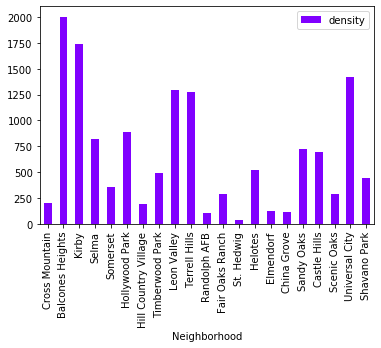

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))

#bexar_merged.hist(column='density')
bexar_merged.plot(kind='bar',x='Neighborhood',y='density', color=rainbow[cluster])
plt.show()

# Let's Examine The Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. 



Cluster 1 - Gym / Fitness Center


In [54]:
bexar_merged.loc[bexar_merged['Cluster Labels'] == 0, bexar_merged.columns[[1] + list(range(5, bexar_merged.shape[1]))]]


,county,state,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4733,Bexar,TX,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4876,Bexar,TX,0,Gym / Fitness Center,Bus Station,Clothing Store,Pizza Place,Department Store,Grocery Store,Chinese Restaurant,Gym,Gift Shop,Food Service
4930,Bexar,TX,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4931,Bexar,TX,0,Athletics & Sports,Racetrack,Wings Joint,Fabric Shop,Construction & Landscaping,Convenience Store,Department Store,Diner,Discount Store,Donut Shop
4986,Bexar,TX,0,Convenience Store,Video Store,Athletics & Sports,Gas Station,Fast Food Restaurant,Construction & Landscaping,Department Store,Diner,Discount Store,Donut Shop
5217,Bexar,TX,0,Gymnastics Gym,Construction & Landscaping,Wings Joint,Fast Food Restaurant,Convenience Store,Department Store,Diner,Discount Store,Donut Shop,Fabric Shop
5279,Bexar,TX,0,Chinese Restaurant,Baseball Field,Park,Pet Store,Pharmacy,Mexican Restaurant,Rental Car Location,Ice Cream Shop,Video Store,Fabric Shop
5289,Bexar,TX,0,Shoe Store,Wings Joint,Construction & Landscaping,Convenience Store,Department Store,Diner,Discount Store,Donut Shop,Fabric Shop,Fast Food Restaurant
5421,Bexar,TX,0,American Restaurant,Gym / Fitness Center,Restaurant,Military Base,Donut Shop,Construction & Landscaping,Convenience Store,Department Store,Diner,Discount Store
5427,Bexar,TX,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cluster 2 - Resturants 

In [55]:
bexar_merged.loc[bexar_merged['Cluster Labels'] == 1, bexar_merged.columns[[1] + list(range(5, bexar_merged.shape[1]))]]


,county,state,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5090,Bexar,TX,1,Business Service,Wings Joint,Fast Food Restaurant,Convenience Store,Department Store,Diner,Discount Store,Donut Shop,Fabric Shop,Food Service
5507,Bexar,TX,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cluster 3 - Parks

In [56]:
bexar_merged.loc[bexar_merged['Cluster Labels'] == 2, bexar_merged.columns[[1] + list(range(5, bexar_merged.shape[1]))]]


,county,state,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5104,Bexar,TX,2,Coffee Shop,Lawyer,Golf Course,Fabric Shop,Construction & Landscaping,Convenience Store,Department Store,Diner,Discount Store,Donut Shop


Cluster 4 - Concert

In [57]:
bexar_merged.loc[bexar_merged['Cluster Labels'] == 3, bexar_merged.columns[[1] + list(range(5, bexar_merged.shape[1]))]]


,county,state,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5705,Bexar,TX,3,IT Services,Gun Shop,Wings Joint,Fabric Shop,Construction & Landscaping,Convenience Store,Department Store,Diner,Discount Store,Donut Shop


# Segmenting El Paso County


The above map and segment and cluster only the neighborhoods in Mecklenburg County. So let's slice the original dataframe and create a new dataframe of the Mecklenburg County data

In [79]:
elpaso_data = TX_data[TX_data.county == 'El Paso']
#elpaso_data.drop(elpaso_data.index[2], inplace=True)
print('The dataframe has', elpaso_data.shape, 'rows and columns respectively.')
elpaso_data.reset_index()

The dataframe has (18, 6) rows and columns respectively.


,index,Neighborhood,county,density,lat,lng,state
0,4138,Homestead Meadows South,El Paso,680.0,31.8110,-106.1643,TX
1,4381,Vinton,El Paso,293.0,31.9600,-106.5936,TX
2,4442,San Elizario,El Paso,514.0,31.5793,-106.2632,TX
3,4478,El Paso,El Paso,1025.0,31.8479,-106.4309,TX
4,4774,Butterfield,El Paso,0.0,31.8426,-106.0822,TX
5,4791,Fabens,El Paso,553.0,31.5136,-106.1521,TX
6,4806,Canutillo,El Paso,715.0,31.9185,-106.6006,TX
7,4870,Tornillo,El Paso,123.0,31.4366,-106.1033,TX
8,5037,Socorro,El Paso,598.0,31.6384,-106.2601,TX
9,5122,Clint,El Paso,222.0,31.5901,-106.2289,TX


In [80]:
elpaso_data = elpaso_data.iloc[2: , ]
print('The dataframe has', elpaso_data.shape, 'rows and columns respectively.')
elpaso_data.reset_index()


The dataframe has (16, 6) rows and columns respectively.


,index,Neighborhood,county,density,lat,lng,state
0,4442,San Elizario,El Paso,514.0,31.5793,-106.2632,TX
1,4478,El Paso,El Paso,1025.0,31.8479,-106.4309,TX
2,4774,Butterfield,El Paso,0.0,31.8426,-106.0822,TX
3,4791,Fabens,El Paso,553.0,31.5136,-106.1521,TX
4,4806,Canutillo,El Paso,715.0,31.9185,-106.6006,TX
5,4870,Tornillo,El Paso,123.0,31.4366,-106.1033,TX
6,5037,Socorro,El Paso,598.0,31.6384,-106.2601,TX
7,5122,Clint,El Paso,222.0,31.5901,-106.2289,TX
8,5239,Morning Glory,El Paso,165.0,31.5648,-106.2089,TX
9,5334,Westway,El Paso,1426.0,31.9603,-106.5760,TX


In [95]:
address = 'El Paso, TX'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of El Paso, TX are {}, {}.'.format(latitude, longitude))

/Users/andyphu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of El Paso, TX are 31.7754152, -106.4646348.


In [96]:

map_elpaso = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(elpaso_data['lat'], elpaso_data['lng'], elpaso_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_elpaso)  
    
map_elpaso

Getting the first neighborhood in El Paso County


In [99]:
print('The first neighborhood in El Paso County is', elpaso_data.loc[4442, 'Neighborhood'])

The first neighborhood in El Paso County is San Elizario


Get the first neighborhood coordiates


In [100]:
neighborhood_latitude = elpaso_data.loc[4442, 'lat'] # neighborhood latitude value
neighborhood_longitude = elpaso_data.loc[4442, 'lng'] # neighborhood longitude value

neighborhood_name = elpaso_data.loc[4442, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of San Elizario are 31.5793, -106.2632.


# Getting the first 100 venues 

In [101]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=FIZWRYADEI2ZAS1YDTQB4PSF2OXC32KYNMKGRAAWDKK3HF5P&client_secret=X5B4KMTELKIXGZ0A0QX1GVZP3EOEDZURW3IKNVRZPYQ30C4A&v=20180605&ll=31.5793,-106.2632&radius=500&limit=100'

In [102]:
results = requests.get(url).json()
#results

Now let's get the categories using the get_category_type



In [103]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [104]:
#cleaning the data 


venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Family Dollar,Discount Store,31.576397,-106.261734


In [105]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))


1 venues were returned by Foursquare.


In [106]:
#nearby venues

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

create a new dataframe called elpaso_venues


In [107]:
elpaso_venues = getNearbyVenues(names=elpaso_data['Neighborhood'],
                                   latitudes=elpaso_data['lat'],
                                   longitudes=elpaso_data['lng']
                                  )

San Elizario
El Paso
Butterfield
Fabens
Canutillo
Tornillo
Socorro
Clint
Morning Glory
Westway
Homestead Meadows North
Horizon City
Sparks
Prado Verde
Fort Bliss
Anthony


In [108]:
print('There are', elpaso_venues.shape, 'rows and columns venues and neighborhoods in El Paso County.')
elpaso_venues.head(10)

There are (34, 7) rows and columns venues and neighborhoods in El Paso County.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,San Elizario,31.5793,-106.2632,Family Dollar,31.576397,-106.261734,Discount Store
1,El Paso,31.8479,-106.4309,American Legion Post 58,31.849650,-106.432007,Lounge
2,Fabens,31.5136,-106.1521,McDonald's,31.509638,-106.149647,Fast Food Restaurant
3,Fabens,31.5136,-106.1521,Mariscos La Güera,31.511617,-106.155893,Seafood Restaurant
4,Canutillo,31.9185,-106.6006,WinkeyDoodles Paintball Adventures,31.920844,-106.597400,Paintball Field
5,Canutillo,31.9185,-106.6006,Intoxalock Ignition Interlock,31.916899,-106.599983,Auto Workshop
6,Canutillo,31.9185,-106.6006,Shur-Sav,31.919827,-106.600254,Grocery Store
7,Canutillo,31.9185,-106.6006,Rio Grande Supermarket,31.919785,-106.600287,Supermarket
8,Canutillo,31.9185,-106.6006,Rio Grande River Regional Park,31.916971,-106.602670,Trail
9,Clint,31.5901,-106.2289,7-Eleven,31.589268,-106.234087,Convenience Store


Text(0, 0.5, 'Venue Count')

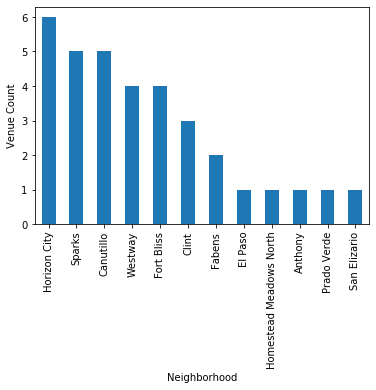

In [109]:
plot1=elpaso_venues["Neighborhood"].value_counts().plot(kind = "bar")
plot1.set_xlabel('Neighborhood')
plot1.set_ylabel('Venue Count')

In [110]:
#number of venues by each neighborhood

elpaso_venues.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Anthony,1,1,1,1,1,1
Canutillo,5,5,5,5,5,5
Clint,3,3,3,3,3,3
El Paso,1,1,1,1,1,1
Fabens,2,2,2,2,2,2
Fort Bliss,4,4,4,4,4,4
Homestead Meadows North,1,1,1,1,1,1
Horizon City,6,6,6,6,6,6
Prado Verde,1,1,1,1,1,1


In [111]:
#exploring unique venues 

print('There are {} uniques categories.'.format(len(elpaso_venues['Venue Category'].unique())))


There are 24 uniques categories.


# El Paso County Analysis

In [112]:
# one hot encoding
elpaso_onehot = pd.get_dummies(elpaso_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
elpaso_onehot['Neighborhood'] = elpaso_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [elpaso_onehot.columns[-1]] + list(elpaso_onehot.columns[:-1])
elpaso_onehot = elpaso_onehot[fixed_columns]

elpaso_onehot.head()

,Neighborhood,American Restaurant,Arts & Entertainment,Athletics & Sports,Auto Workshop,Bookstore,Business Service,Coffee Shop,Convenience Store,Discount Store,Fast Food Restaurant,Gas Station,Grocery Store,Gym / Fitness Center,Lounge,Mexican Restaurant,Nightlife Spot,Other Repair Shop,Paintball Field,Pharmacy,Playground,Seafood Restaurant,Supermarket,Trail,Video Store
0,San Elizario,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,El Paso,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Fabens,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fabens,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Canutillo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [113]:
elpaso_onehot.shape
print('The dataframe has', elpaso_onehot.shape, 'rows and columns respectively.')

The dataframe has (34, 25) rows and columns respectively.


In [114]:
#Grouping rows by neighborhood by taking the mean of the frequency of occurrence of each category

elpaso_grouped = elpaso_onehot.groupby('Neighborhood').mean().reset_index()
elpaso_grouped


,Neighborhood,American Restaurant,Arts & Entertainment,Athletics & Sports,Auto Workshop,Bookstore,Business Service,Coffee Shop,Convenience Store,Discount Store,Fast Food Restaurant,Gas Station,Grocery Store,Gym / Fitness Center,Lounge,Mexican Restaurant,Nightlife Spot,Other Repair Shop,Paintball Field,Pharmacy,Playground,Seafood Restaurant,Supermarket,Trail,Video Store
0,Anthony,0.00,0.0,0.0,0.000000,0.00,0.0,0.00,1.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000
1,Canutillo,0.00,0.0,0.0,0.200000,0.00,0.0,0.00,0.000000,0.000000,0.00,0.00,0.20,0.0,0.0,0.000000,0.0,0.0,0.2,0.000000,0.000000,0.0,0.2,0.20,0.000000
2,Clint,0.00,0.0,0.0,0.000000,0.00,0.0,0.00,0.333333,0.000000,0.00,0.00,0.00,0.0,0.0,0.333333,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.00,0.000000
3,El Paso,0.00,0.0,0.0,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.00,0.00,0.00,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000
4,Fabens,0.00,0.0,0.0,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.50,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.5,0.0,0.00,0.000000
5,Fort Bliss,0.25,0.0,0.0,0.000000,0.25,0.0,0.25,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.25,0.000000
6,Homestead Meadows North,0.00,0.0,1.0,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000
7,Horizon City,0.00,0.0,0.0,0.166667,0.00,0.0,0.00,0.000000,0.333333,0.00,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.333333,0.000000,0.0,0.0,0.00,0.166667
8,Prado Verde,0.00,0.0,0.0,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.00,0.00,0.00,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000
9,San Elizario,0.00,0.0,0.0,0.000000,0.00,0.0,0.00,0.000000,1.000000,0.00,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000


In [115]:
# Top 5 venues

num_top_venues = 5

for hood in elpaso_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = elpaso_grouped[elpaso_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Anthony----
                 venue  freq
0    Convenience Store   1.0
1  American Restaurant   0.0
2               Lounge   0.0
3                Trail   0.0
4          Supermarket   0.0


----Canutillo----
             venue  freq
0            Trail   0.2
1    Auto Workshop   0.2
2      Supermarket   0.2
3  Paintball Field   0.2
4    Grocery Store   0.2


----Clint----
                 venue  freq
0           Playground  0.33
1    Convenience Store  0.33
2   Mexican Restaurant  0.33
3  American Restaurant  0.00
4               Lounge  0.00


----El Paso----
                  venue  freq
0                Lounge   1.0
1   American Restaurant   0.0
2  Arts & Entertainment   0.0
3                 Trail   0.0
4           Supermarket   0.0


----Fabens----
                  venue  freq
0    Seafood Restaurant   0.5
1  Fast Food Restaurant   0.5
2   American Restaurant   0.0
3                Lounge   0.0
4                 Trail   0.0


----Fort Bliss----
                 venue  freq
0  Am

In [116]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [117]:
#Now let's create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = elpaso_grouped['Neighborhood']

for ind in np.arange(elpaso_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(elpaso_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anthony,Convenience Store,Video Store,Trail,Arts & Entertainment,Athletics & Sports,Auto Workshop,Bookstore,Business Service,Coffee Shop,Discount Store
1,Canutillo,Grocery Store,Supermarket,Auto Workshop,Paintball Field,Trail,Fast Food Restaurant,Arts & Entertainment,Athletics & Sports,Bookstore,Business Service
2,Clint,Playground,Mexican Restaurant,Convenience Store,Video Store,Gas Station,Arts & Entertainment,Athletics & Sports,Auto Workshop,Bookstore,Business Service
3,El Paso,Lounge,Video Store,Gas Station,Arts & Entertainment,Athletics & Sports,Auto Workshop,Bookstore,Business Service,Coffee Shop,Convenience Store
4,Fabens,Seafood Restaurant,Fast Food Restaurant,Video Store,Gas Station,Arts & Entertainment,Athletics & Sports,Auto Workshop,Bookstore,Business Service,Coffee Shop
5,Fort Bliss,American Restaurant,Trail,Bookstore,Coffee Shop,Arts & Entertainment,Athletics & Sports,Auto Workshop,Business Service,Convenience Store,Discount Store
6,Homestead Meadows North,Athletics & Sports,Video Store,Trail,Arts & Entertainment,Auto Workshop,Bookstore,Business Service,Coffee Shop,Convenience Store,Discount Store
7,Horizon City,Pharmacy,Discount Store,Video Store,Auto Workshop,Gas Station,Arts & Entertainment,Athletics & Sports,Bookstore,Business Service,Coffee Shop
8,Prado Verde,Gym / Fitness Center,Video Store,Gas Station,Arts & Entertainment,Athletics & Sports,Auto Workshop,Bookstore,Business Service,Coffee Shop,Convenience Store
9,San Elizario,Discount Store,Video Store,Trail,Arts & Entertainment,Athletics & Sports,Auto Workshop,Bookstore,Business Service,Coffee Shop,Convenience Store


In [118]:
neighborhoods_venues_sorted.shape
print('The dataframe has', neighborhoods_venues_sorted.shape, 'rows and columns respectively.')



The dataframe has (12, 11) rows and columns respectively.


# El Paso County Clustering

Running kmeans to cluster the neighborhood into 4 clusters



In [119]:
# set number of clusters
kclusters = 4

elpaso_grouped_clustering = elpaso_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(elpaso_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

kmeans.labels_.shape

(12,)

In [121]:
elpaso_merged = elpaso_data

# add clustering labels
elpaso_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
elpaso_merged = elpaso_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

elpaso_merged

ValueError: Length of values does not match length of index

In [122]:
elpaso_merged.shape


(16, 6)

In [123]:
elpaso_merged = elpaso_merged.iloc[4:,]

In [124]:
elpaso_merged.shape

(12, 6)

In [125]:
kmeans.labels_.shape

(12,)

In [126]:
# Rerun code add clustering labels
elpaso_merged['Cluster Labels']=kmeans.labels_

elpaso_merged

/Users/andyphu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhood,county,density,lat,lng,state,Cluster Labels
4806,Canutillo,El Paso,715.0,31.9185,-106.6006,TX,0
4870,Tornillo,El Paso,123.0,31.4366,-106.1033,TX,0
5037,Socorro,El Paso,598.0,31.6384,-106.2601,TX,0
5122,Clint,El Paso,222.0,31.5901,-106.2289,TX,1
5239,Morning Glory,El Paso,165.0,31.5648,-106.2089,TX,0
5334,Westway,El Paso,1426.0,31.9603,-106.5760,TX,0
5361,Homestead Meadows North,El Paso,133.0,31.8483,-106.1707,TX,2
5634,Horizon City,El Paso,866.0,31.6799,-106.1903,TX,0
5664,Sparks,El Paso,950.0,31.6727,-106.2399,TX,3
5672,Prado Verde,El Paso,677.0,31.8898,-106.6135,TX,0


In [127]:
#cluster visuals

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(elpaso_merged['lat'], elpaso_merged['lng'], elpaso_merged['Neighborhood'], elpaso_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
      
from folium.plugins import FloatImage
image_file = 'http://www.Texas.com/TX/Counties/Images/ElPaso_County_TX_Map.jpg'

FloatImage(image_file, bottom=0, left=70).add_to(map_clusters)
map_clusters

<Figure size 720x720 with 0 Axes>

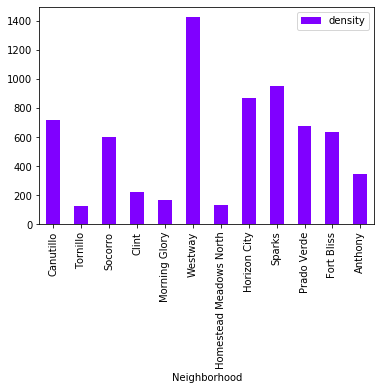

In [128]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#elpaso_merged.hist(column='density')
elpaso_merged.plot(kind='bar',x='Neighborhood',y='density', color=rainbow[cluster])
plt.show()

# Let's Examine The Clusters

Once again, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster. I will leave this exercise to you.



Cluster 1 - Store

In [129]:
elpaso_merged.loc[elpaso_merged['Cluster Labels'] == 0, elpaso_merged.columns[[1] + list(range(5, elpaso_merged.shape[1]))]]


,county,state,Cluster Labels
4806,El Paso,TX,0
4870,El Paso,TX,0
5037,El Paso,TX,0
5239,El Paso,TX,0
5334,El Paso,TX,0
5634,El Paso,TX,0
5672,El Paso,TX,0
5827,El Paso,TX,0
5844,El Paso,TX,0


Cluster 2 - Restaurants

In [130]:
elpaso_merged.loc[elpaso_merged['Cluster Labels'] == 1, elpaso_merged.columns[[1] + list(range(5, elpaso_merged.shape[1]))]]


,county,state,Cluster Labels
5122,El Paso,TX,1


Cluster 3 - Lounge

In [131]:
elpaso_merged.loc[elpaso_merged['Cluster Labels'] == 2, elpaso_merged.columns[[1] + list(range(5, elpaso_merged.shape[1]))]]


,county,state,Cluster Labels
5361,El Paso,TX,2


Cluster 4 - Trail

In [132]:
elpaso_merged.loc[elpaso_merged['Cluster Labels'] == 3, elpaso_merged.columns[[1] + list(range(5, elpaso_merged.shape[1]))]]


,county,state,Cluster Labels
5664,El Paso,TX,3


# Conclusion

In general, while all of these tools are useful, there is nothing like visiting the actual city, seeing the neighborhoods, and speaking with residents. If it's possible, an in-person visit is highly recommended before making a big move.